# Intro to Data Analysis with Python

In this notebook, we will show you how to solve a data analysis problem end-to-end.

The steps and decisions I took may not be the best or the fastest - the goal is to give you an **overview** of what steps might be necessary.

## Python

#### 1.1. **Comments**

First, how to write comments. Feel free to annotate a lot, so that you remember what you did and why :)

In [1]:
# This is a comment

"""This is also a comment"""

'This is also a comment'

#### 1.2. Syntax

Below are some examples to get a feel for Python if you've never seen it before. There are (for our level) no types for the variables.

In [2]:
# Variables

x = 5
y = 0.25
z = "some text"

# lists
a = [1, 2, 3]
b = [x, y, z]

In [3]:
print(x + y)
print(x * z)
# print(y * z)    # this does not work

print(b)          # lists can have any objects as elements
print(a * x)

5.25
some textsome textsome textsome textsome text
[5, 0.25, 'some text']
[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


Since Python doesn't use brackets to divide namespaces, the spacing is very important. For example, **all the code inside a loop or an if-else must have the same indent!**

In [4]:
# Loops

for i in range(len(a)): # range(n) yields all values in the interval [0, n-1]
    a[i] += 2           # select element with a[.]

a

[3, 4, 5]

In [5]:
# Conditionals 

def is_odd(x):
    if x % 2 == 0:
        return True
    else:
        return False

is_odd(5)

False

Python also has `while`-loops and cool things like *comprehensions*, but let's leave that for now.

#### 1.3. numpy

One of the most important libraries when working with numerical data is `numpy`. It provides support for many numerical operations on scalars, vectors, matrices and fields.

In [6]:
import numpy as np   # importing numpy with the alias np

In [7]:
n = np.array([1, 2, 3])                   # initialize array with a list
m = np.array([[1, 2, 3], [4, 5, 6]])      # initialize 2D array with list of lists -> matrix

In [8]:
n

array([1, 2, 3])

In [9]:
n.shape     # very important attribute, tells us the form of the vector or array
 
# (3,) means that a is a column (standing) vector with 3 elements 

(3,)

In [10]:
n.sum()           # no arguments -> sum of all elements in the array

6

In [11]:
m

array([[1, 2, 3],
       [4, 5, 6]])

In [12]:
m.shape   # 2 rows, 3 columns

(2, 3)

In [13]:
m.sum(axis=0)     # axis=0 means per column, axis=1 means per row

array([5, 7, 9])


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Analysis

Two libraries will help us analyse our data - `pandas` and `matplotlib`.

We use `pandas` to read in tabular data from local files, as well as to clean and transform the data. It also offers some visualization functions, but the freedom there is limited.
`matplotlib` is a rich visualization library.  

In [14]:
# Importing libraries

import numpy as np       # vectors and matrices + functions
import pandas as pd      # DataFrame data structure + functions
import matplotlib.pyplot as plt   # visualization
import seaborn as sns             # visualization

# show the visualizations in-line
%matplotlib inline      
sns.set_theme()

_____________________

### Data

The dataset is a simplified version of the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php)'s [Statlog (German Credit Data) Data Set](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). 

Modified version downloaded from [Kaggle](https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk). [License](https://creativecommons.org/publicdomain/zero/1.0/).

**The data set consists of customers that have taken out a loan. Each person is classified as good or bad credit risks according to the set of attributes:**

Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
1 | Age | person's age | numeric | age of the bank customer
2 | Sex | person's sex | text | "male" or "female"
3 | Job | student's age | numeric | 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
4 | Housing | type of housing | text | "own", "rent", or "free"
5 | Saving accounts | savings account balance category | text | "little", "moderate", "quite rich", "rich"
6 | Checking account | checking account balance category | text | "little", "moderate", "rich"
7 | Credit amount | credit amount | numeric | credit amount in DM (Deutsche Marke)
8 | Duration | credit duration | numeric | duration of the credit in months - 4 to 72 months
9 | Purpose | credit purpose | text | "car", "furniture/equipment", "radio/TV", "domestic appliances", "repairs", "education", "business", "vacation/others"


**The target variable is `Risk`:**

Feature ID| Feature Name |Description | Type | Values
--|-----|-----|----|---
10 | Risk | credit risk | text | "good" (low risk) or "bad" (high risk)

_________________________

### Data Loading

In [15]:
data = pd.read_csv('Data/german_credit_data.csv')

data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


### General functions

In [16]:
# Show the first n lines (no number gives first 5)

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [17]:
# Summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


A lot of info here: 

- 1000 entries/people
- 9 features (Age-Purpose)
- Missing values in the features `Saving accounts` and `Checking account`
- Memory usage

In [18]:
# Selection - column

data['Purpose']

0                 radio/TV
1                 radio/TV
2                education
3      furniture/equipment
4                      car
              ...         
995    furniture/equipment
996                    car
997               radio/TV
998               radio/TV
999                    car
Name: Purpose, Length: 1000, dtype: object

In [19]:
# Selection - row

data.iloc[0]

Age                       67
Sex                     male
Job                        2
Housing                  own
Saving accounts          NaN
Checking account      little
Credit amount           1169
Duration                   6
Purpose             radio/TV
Risk                    good
Name: 0, dtype: object

In [20]:
# Selection - condition

data[data['Credit amount'] < 400]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
111,23,female,2,rent,little,rich,392,15,education,good
157,45,male,1,own,little,little,339,12,education,good
177,52,male,2,own,quite rich,little,338,6,radio/TV,good
309,22,male,1,rent,little,moderate,276,9,car,good
379,52,female,1,own,moderate,NaN,362,6,car,good
458,27,female,2,own,little,little,343,6,domestic appliances,good
493,38,male,2,own,NaN,moderate,368,6,radio/TV,good
590,58,female,1,own,little,little,385,12,radio/TV,good
725,41,female,1,own,rich,NaN,250,6,car,good


In [21]:
# statistical functions

data['Age'].mean()   #  .max()   .min()   .std() 

35.546

In [22]:
# unique values and counts

data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

---------------

### Exploratory data analysis (EDA)

My favourite way to get an overview of the features is to visualize how each is distributed. Of course, there are different types of features, numerical, categorical, text etc. For this data set, we need to take only two cases into account - numerical features (integers/floats) and categorical features (small number of distinct values).

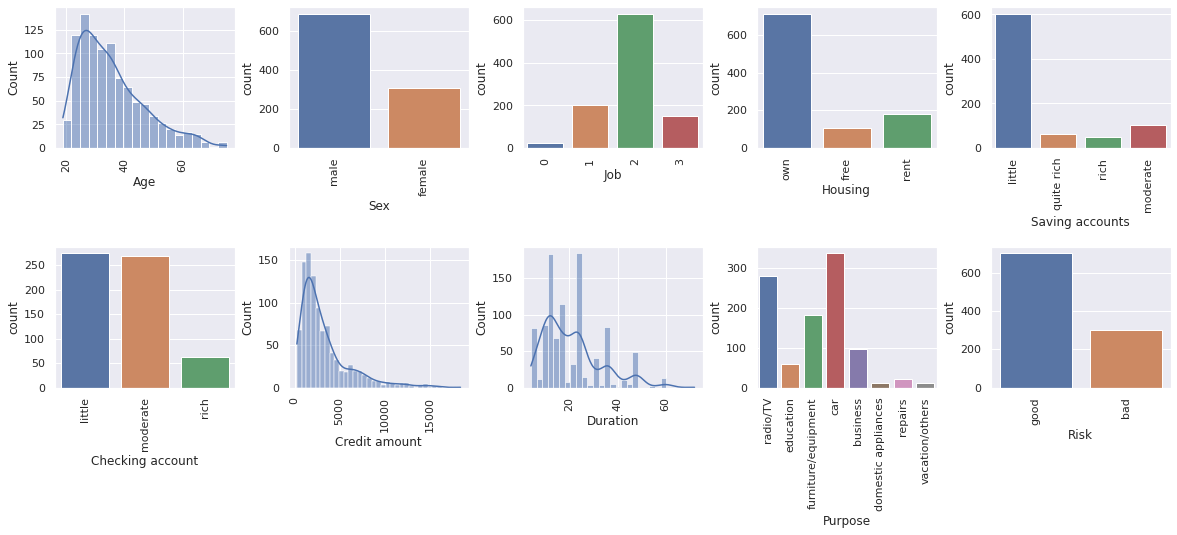

In [23]:
# Plot feature distributions

# Set the size of the entire plot (I set this by trial and error :)
fig = plt.figure(figsize=(20, 7))  

# Go through all the columns (there is 10 of them with the target)
for i, col in enumerate(data.columns):
    
    sp = plt.subplot(2, 5, i+1)  # 4 x 3 is the grid to place the plots in
    
    if len(data[col].value_counts()) > 10:    # If the column has more than 10 distinct values, we
                          # can assume the column is not categorical
        sns.histplot(x=col, data=data, kde=True)    # Nice histogram
        
    else:    # Categorical data
        sns.countplot(x=col, data=data)   # Count plot
    plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.7)

**Some things we notice:**

- Most people in the dataset are 20-40 years old
- The 'Job' column has four values. Looking into the [dataset description](https://www.kaggle.com/datasets/uciml/german-credit), we can see that the meanings are as follows:
| Code | Job type |
| :--- | ---: |
| 0 | unskilled and non-resident |
| 1 | unskilled and resident |
| 2 | skilled |
| 3 | highly skilled |

- The credit amount was usually 2000-3000 DM
- The credit duration was usually 60 months at most, usually 12 or 24 months
- The target variable `Risk` is unbalanced - 70% of the credits were low-risk ('good')

---------

Another useful function is `.describe()`, which shows us important statistics of the columns/features. We saw some of them in the visualizations above. `.describe()` can be used on the entire `DataFrame`, but also on chosen columns.

In [24]:
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


------

Let's try to answer some data science questions.

#### Do people with highly skilled jobs take out larger loans?

We can use a boxplot to answer this question. The center line of the box represents the mean credit amount of all people with a particular job level. The box shows the quartiles, and the whiskers going up and down - the entirety of the distribution's support. The points above the whiskers are considered to be outliers.

<AxesSubplot:xlabel='Job', ylabel='Credit amount'>

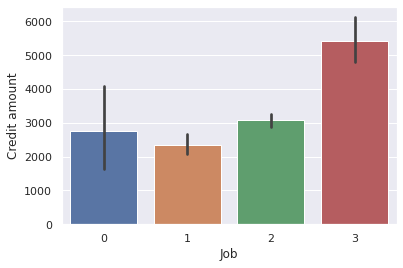

In [25]:
sns.barplot(x="Job", y="Credit amount", data=data)

Yes, apparently. The loans taken out by people with job level 3 are 2000 DM higher on average.

#### Is the credit's purpose indicative of the risk?

<AxesSubplot:xlabel='Purpose', ylabel='Credit amount'>

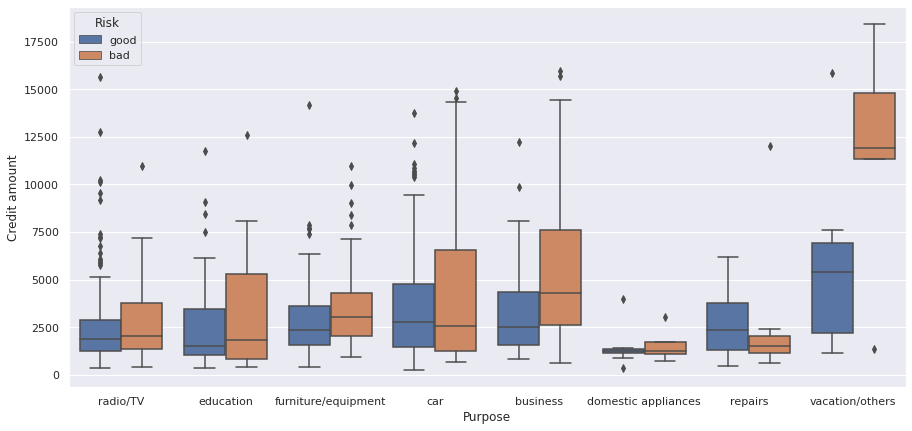

In [26]:
fig = plt.figure(figsize=(15, 7)) 
sns.boxplot(x="Purpose", y="Credit amount", data=data, hue="Risk")

At least when taking out a loan for the `vacation/others` purpose, the credit amount is very clearly indicative of how risky the loan is. 

### Data Cleaning

Before we dive into the machine learning part of this notebook, we have some cleaning to do. Machine learning algorithms have problems when dealing with missing values.

**How many `NaN` values are there in the data?**

In [27]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

There are missing values in the `Saving accounts` and `Credit account` features.

#### Missing values

There are several ways to handle missing values:
- Imputation - Replacing the missing values with a real value (e.g. mean or median of the feature)
- Deleting entries with missing values
- Deleting columns/features with missing values

The correct way to handle missing data is not universal. For example, if the number of missing values is too high, imputation will add a lot of noise, which can make model learning very difficult.

If we have a small data set, deleting entries means we would have even fewer data points to train on.

If all features in a data set have missing values, it doesn't make sense to delete those features.

In our case, however, the missing values are in only two of the **categorical** columns - `Saving accounts` and `Checking account`. The missing values must then correspond to cases where is was unknown whether the person had such an account, or how much money was in it.

Let's check how well these features correspond to the target variable `Risk`. We will treat the `NaN` values as a separate category.

<AxesSubplot:xlabel='Count', ylabel='Saving accounts'>

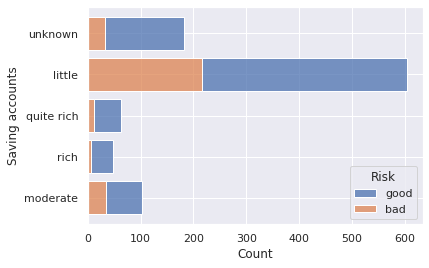

In [28]:
sns.histplot(data=data.fillna('unknown'), y="Saving accounts", hue="Risk", multiple="stack", shrink=.8)

Then, `Checking account`:

<AxesSubplot:xlabel='Count', ylabel='Checking account'>

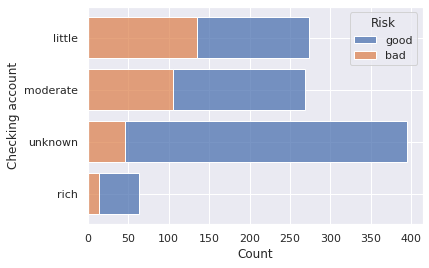

In [29]:
sns.histplot(data=data.fillna('unknown'), y="Checking account", hue="Risk", multiple="stack", shrink=.8)

There are many more examples of good credit than bad credit when the value of the two features is `unknown`. So this category might help with the prediction of the risk. However, in the real world, this type of missing data is not random and can make our model very biased - for example, the `unknown` category's distribution most closely matches the distribution of the `rich` categories.  

In [30]:
data = data.fillna('unknown')

______________________

#### Convert to numerical

Since most machine learning algorithms require numerical data, let's use indicator variables for each category. We need to convert all categorical features (their values are strings) to numbers. The categorical features have the dtype `object`:

In [31]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


We can convert these text features to numerical by using **indicator variables**.

The `pandas` function `.get_dummies()` does just that, expanding $N$ categories into $N$ indicator (binary) variables.

In [33]:
categorical_features = data.select_dtypes(include='object').columns

print(categorical_features)

num_data = pd.get_dummies(data, columns=categorical_features)
num_data.head()

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,67,2,1169,6,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,22,2,5951,48,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,49,1,2096,12,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,53,2,4870,24,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


We now have 28 columns instead of 10, but we can delete some of them in the next step.

Let's make sure they're all numerical.

In [34]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_female                   1000 non-null   uint8
 5   Sex_male                     1000 non-null   uint8
 6   Housing_free                 1000 non-null   uint8
 7   Housing_own                  1000 non-null   uint8
 8   Housing_rent                 1000 non-null   uint8
 9   Saving accounts_little       1000 non-null   uint8
 10  Saving accounts_moderate     1000 non-null   uint8
 11  Saving accounts_quite rich   1000 non-null   uint8
 12  Saving accounts_rich         1000 non-null   uint8
 13  Saving accounts_unknown      1000 non-null   uint

We now have the `Risk_Bad` variable with 1 being True and 0 False. We make this transformation for two reasons:

- More intuitive than having to think what Risk = 0 means.
- Having 'bad' be the positive class (index 1) makes evaluation easier, since we usually want to predict the bad credits anyway.

_________________

### Correlation

For the same numerical features, we can also compute the correlation.

The correlation coefficient is a value between -1 and 1. 
- A coefficient of 0 means that the two variables are not correlated, that is, we can't draw conclusions about one variable if we know the other.
- Coefficients >0 denote a positive correlation, meaning that an increase in one variable is connected to an increase in the other variable. A value of 1 means the variables are exactly equal.
- Coefficients <0 denote a negative correlation, meaning that an increase in one variable is connected to a decrease in the other variable. 

<AxesSubplot:>

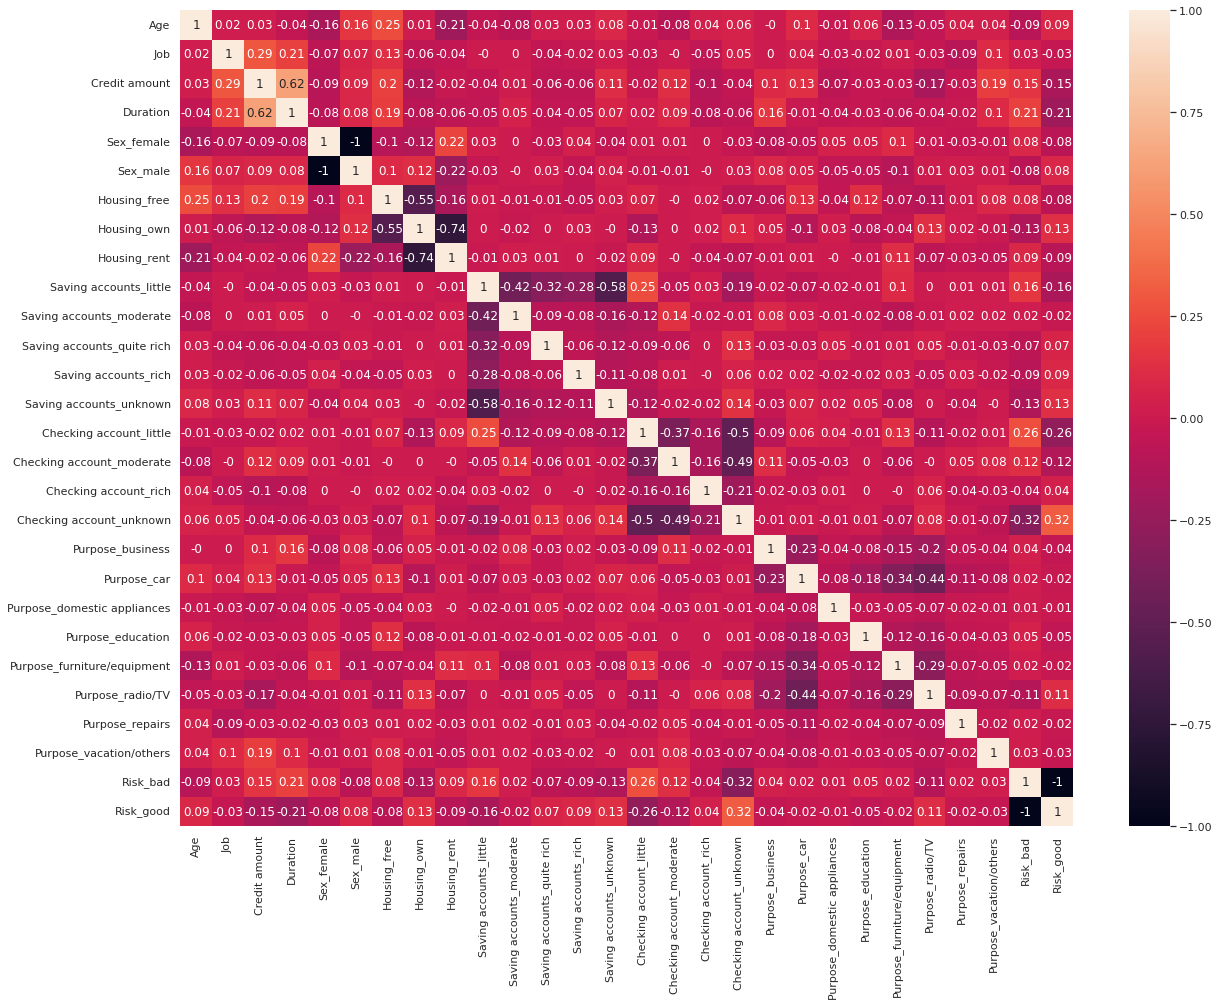

In [35]:
correlation = num_data.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation.round(decimals=2), annot=True, vmax=1, vmin=-1)

**Observations:**

- The binary indicator variables for `Sex` and `Risk` have perfect anti-correlation, so we can drop one of each, for example `Sex_male` and `Risk_good`.
- There is a relatively high positive correlation between the variables `Credit amount` and `Duration` (0.62). Of course, larger credit amounts usually have longer credit durations, so no surprise there.
- The variables with highest correlation with the target variable are `Checking_account_unknown` (indicates good credit) and `Checking_account_little` (indicates bad credit). The features `Credit amount`, `Saving accounts_little` and `Duration` are also related to the `Risk` variable.

In [36]:
num_data = num_data.drop(['Sex_male', 'Risk_good'], axis=1)
num_data.head()

,Age,Job,Credit amount,Duration,Sex_female,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad
0,67,2,1169,6,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,22,2,5951,48,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,49,1,2096,12,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,45,2,7882,42,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,53,2,4870,24,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


__________________________

### Train and test data

How do we go about using machine learning to predict whether a loan is good or bad risk? 

First, we need to split our data in two separate datesets - a training data set with known labels/risk, and a test data set where we test the learned knowledge.

In [37]:
from sklearn.model_selection import train_test_split

labels = num_data.Risk_bad
features = num_data.drop("Risk_bad", axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels,  random_state=42)

X_train.head()

,Age,Job,Credit amount,Duration,Sex_female,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
82,24,1,1568,18,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
991,34,1,1569,15,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
789,27,2,5998,40,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
894,29,2,1169,18,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
398,46,2,1223,12,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
X_test.shape

(250, 25)

We have 750 training samples and 250 test samples.

----------------------

Next, we need a model. The most important question we need to answer is...



### What are we trying to predict?   

The `Risk_bad` variable, which is binary (two categories).

The problem to solve is called [binary classification](https://en.wikipedia.org/wiki/Binary_classification).
There are many algorithms that can solve binary classification problems. We will look at two example models - [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) and [logistic regression](https://kambria.io/blog/logistic-regression-for-machine-learning/#:~:text=What%20Is%20Logistic%20Regression%3F,either%20a%200%20or%201.). Let's import the algorithms and some other helpful packages first.

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
import graphviz

### Evaluation

After looking into what our model is doing, we can perform a quantitative evaluation. For this, we need to use the learned model to predict the labels of *unseen* data, in this case our test data `X_test`.

Let's first pack everything into a function, since we'll evaluate both models.

In [40]:
def evaluate_model(model, model_name, test_data, test_labels):

    # Use the learned model to make predictions about unseen data
    test_predictions = model.predict(test_data)
    
    # Print the classification report
    print(metrics.classification_report(test_labels, test_predictions))
    
    # Evaluate by comparing the predictions with the true labels of the test data (here, in a confusion matrix)
    confusion_matrix = metrics.confusion_matrix(test_labels,  test_predictions)

    # Turn the confusion matrix into a dataframe
    matrix_df = pd.DataFrame(confusion_matrix)

    # Plot the result
    ax = plt.axes()
    sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax)
    ax.set_title('Confusion Matrix - {}'.format(model_name), fontsize=15)
    ax.set_xlabel("Predicted Risk_bad", fontsize=15)
    ax.set_ylabel("Actual Risk_bad", fontsize=15)
    plt.show()

___________________

## 3. Decision Tree

A decision tree is exactly what it sounds like - starting from the top (or the root) of the tree, which contains all data points, we start branching out by choosing feature ranges that allow us to split the data according to the target variable. Having learned a good tree, unseen data is then classified by following the correct tree branches to a tree leaf.

In [41]:
# Create a classifier instance
model_dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')    

# Learn from the training data = fit the classifier to the training data
model_dtree = model_dtree.fit(X_train, y_train)

#### **Let's visualize the learned tree.** It will be saved in a pdf file in the notebook's directory.

In [42]:
dot_data = export_graphviz(model_dtree, out_file=None, feature_names=features.columns, 
                                class_names=np.array(['good', 'bad']), filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("CreditRisk") 

'CreditRisk.pdf'

#### **Evaluation**

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       178
           1       0.44      0.39      0.41        72

    accuracy                           0.68       250
   macro avg       0.60      0.59      0.60       250
weighted avg       0.67      0.68      0.67       250



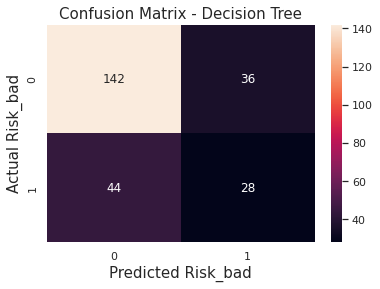

In [43]:
evaluate_model(model_dtree, 'Decision Tree', X_test, y_test)


The confusion matrix compares the predictions with the true test labels. The diagonal shows the correct guesses and above and below are the 'confusions' where our model was wrong.

Generally when doing classification, what we want to see is a diagonal with high numbers. That is not the case here, since the lower right (number of actual bad risk customers that were predicted as bad risk) is the lowest value. Recognizing the good risk customers, however, seems easy in comparison.

If we think about it, in the real world it is much more important to be able to predict bad risk customers than low risk customers. As such, this model is far from optimal, due to the higher cost of classifying a high risk loan as low risk.



----------

Let's take look at another classifier.

## 4. Logistic Regression

Logistic regression is a different type of classification algorithm. It used gradient descent to minimize a given error/loss function. However, gradient methods assume the input data are standardized (to the same mean and standard deviation). 

Let's scale our data. It's very important that the scaling statistics are calculated only on the training data (otherwise we're cheating!).

In [44]:
from sklearn.preprocessing import StandardScaler

# Create scaler instance
scaler = StandardScaler().fit(X_train)  
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train_std.head()

,Age,Job,Credit amount,Duration,Sex_female,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,-1.016566,-1.430408,-0.619231,-0.274896,1.471243,-0.355142,-1.577457,2.173750,-1.211241,2.935198,...,-0.252646,1.235011,3.045320,-0.719874,-0.116248,-0.234206,-0.455773,-0.633932,-0.156813,-0.116248
1,-0.124215,-1.430408,-0.618891,-0.529848,-0.679697,-0.355142,0.633932,-0.460034,-1.211241,2.935198,...,-0.252646,1.235011,-0.328373,-0.719874,-0.116248,-0.234206,-0.455773,1.577457,-0.156813,-0.116248
2,-0.748861,0.095632,0.886105,1.594758,-0.679697,-0.355142,0.633932,-0.460034,0.825599,-0.340693,...,-0.252646,-0.809709,-0.328373,-0.719874,-0.116248,4.269750,-0.455773,-0.633932,-0.156813,-0.116248
3,-0.570391,0.095632,-0.754813,-0.274896,-0.679697,-0.355142,0.633932,-0.460034,-1.211241,-0.340693,...,-0.252646,1.235011,-0.328373,-0.719874,-0.116248,-0.234206,-0.455773,1.577457,-0.156813,-0.116248
4,0.946606,0.095632,-0.736464,-0.784801,-0.679697,-0.355142,-1.577457,2.173750,0.825599,-0.340693,...,-0.252646,-0.809709,-0.328373,1.389132,-0.116248,-0.234206,-0.455773,-0.633932,-0.156813,-0.116248


A result of this transformation is the loss of readability - it's impossible to tell what `Age`=-1.016566 means.

In [45]:
# Create a classifier instance
model_lr = LogisticRegression(class_weight='balanced')    

# Learn from the training data = fit the classifier to the training data
model_lr = model_lr.fit(X_train_std, y_train)      

Let's look at the test data results.

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       178
           1       0.48      0.64      0.55        72

    accuracy                           0.70       250
   macro avg       0.66      0.68      0.66       250
weighted avg       0.73      0.70      0.71       250



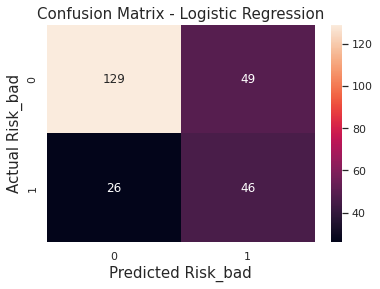

In [46]:
evaluate_model(model_lr, 'Logistic Regression', X_test_std, y_test)

At first glance, performance on the doesn't look much different than the Decision Tree model.

However, the recall score for the positive class (`Risk_bad`=1) has increased by a good margin, and even the accuracy score (the percentage of correct predictions) has increased slightly.

As we've discusses already, for this specific use case what we care about is recognizing bad customers (`Risk_bad` = 1). 
This means that the worst source of error for any model would be classifying a bad risk customer as good. This scenario corresponds to the lower left corner of the confusion matrix, and we can see that is the lowest value in the graphic by a good margin. Although the model is not perfect, it can be useful to the people deciding whether to approve a credit or not.



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)